In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [8]:
granite = pd.read_csv("/Users/lixinjin/Desktop/GeorgiaTech/fall2022_VIP/Gr1.csv")
granite = granite.iloc[2:102]
# granite.head(5)
granite_new = granite[[' Hardness(GPa)', ' Modulus', ' X', ' Y']]
granite_new.rename(columns={' Hardness(GPa)': 'Hardness', ' Modulus': 'Modulus', ' X': 'X', ' Y': 'Y'}, inplace=True)
granite_new.index = np.arange(1, len(granite_new) + 1)

### Using 1.5IQR rule to remove outliers
#### Lower Bound: (Q1 - 1.5 * IQR) 
#### Upper Bound: (Q3 + 1.5 * IQR)

In [9]:
# Define the function to remove outliers
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

granite_removed = remove_outlier_IQR(granite_new)
granite_removed = pd.DataFrame(granite_removed)
granite_removed

,Hardness,Modulus,X,Y
1,0.387642,6.648113,-3.770873228,0.002520166
2,1.224675,32.848149,-2.771180807,0.002698761
3,NaN,NaN,-1.771468543,0.002708683
4,1.841265,37.080645,-0.771160963,0.002708683
5,10.465644,178.110457,0.228789427,0.002698761
...,...,...,...,...
96,25.739224,211.007222,1.228045284,-8.997162332
97,42.664982,NaN,2.227499578,-8.997162332
98,NaN,362.929558,3.227747626,-8.997162332
99,26.693745,185.871818,4.22771786,-8.997162332


In [10]:
granite_removed = granite_removed.interpolate(axis=0) # default method: linear
granite_removed # outliers problem

,Hardness,Modulus,X,Y
1,0.387642,6.648113,-3.770873228,0.002520166
2,1.224675,32.848149,-2.771180807,0.002698761
3,1.532970,34.964397,-1.771468543,0.002708683
4,1.841265,37.080645,-0.771160963,0.002708683
5,10.465644,178.110457,0.228789427,0.002698761
...,...,...,...,...
96,25.739224,211.007222,1.228045284,-8.997162332
97,42.664982,286.968390,2.227499578,-8.997162332
98,34.679363,362.929558,3.227747626,-8.997162332
99,26.693745,185.871818,4.22771786,-8.997162332


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'with outliers')

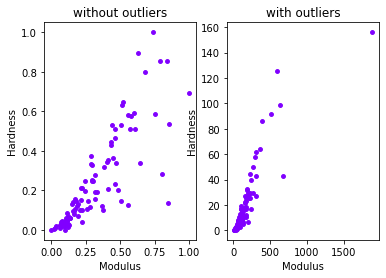

In [350]:
import matplotlib.cm as cm 
colors = cm.rainbow(np.linspace(0, 1, granite_remoevd['Hardness'].shape[0]))
plt.figure(figsize=(6,4))
plt.subplot(1, 2, 1)
plt.scatter(x = granite_remoevd['Modulus'], y = granite_remoevd['Hardness'], s = 15, c = colors[0])
plt.xlabel("Modulus")
plt.ylabel("Hardness")
plt.title("without outliers")

plt.subplot(1, 2, 2)
plt.scatter(x = granite_new['Modulus'], y = granite_new['Hardness'], s = 15, c = colors[0])
plt.xlabel("Modulus")
plt.ylabel("Hardness")
plt.title("with outliers")

In [351]:
# Normolization
hardness_diff = granite_remoevd["Hardness"].max() - granite_remoevd["Hardness"].min()
granite_removed["Hardness"] = (granite_removed["Hardness"].sub(granite_removed["Hardness"].min(), fill_value=0)) / hardness_diff

modulus_diff = granite_remoevd["Modulus"].max() - granite_remoevd["Modulus"].min()
granite_removed["Modulus"] = (granite_removed["Modulus"].sub(granite_removed["Modulus"].min(), fill_value=0)) / modulus_diff

In [352]:
granite_removed.head(10) # dataset after normalization

,Hardness,Modulus,X,Y,label
1,0.000517,0.000000,-3.770873228,0.002520166,0
2,0.017389,0.073537,-2.771180807,0.002698761,0
3,0.023602,0.079477,-1.771468543,0.002708683,0
4,0.029816,0.085417,-0.771160963,0.002708683,0
5,0.203648,0.481255,0.228789427,0.002698761,2
6,0.208729,0.410349,1.228422316,0.002708683,2
7,0.854702,0.836553,2.228809271,0.002708683,1
8,0.582784,0.553095,3.228710052,0.002708683,2
9,0.276862,0.316251,4.228501692,0.002708683,3
10,0.117933,0.282911,5.228739818,0.002708683,3


In [353]:
# GMM
from sklearn.mixture import GaussianMixture 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [354]:
granite_subset = granite_remoevd[['Hardness', 'Modulus']]

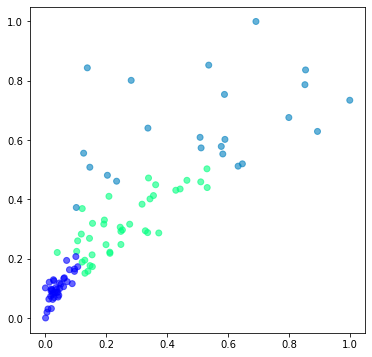

In [355]:
gmm_granite = gmm = GaussianMixture(n_components = 3) 
gmm.fit(granite_subset)

plt.scatter(granite_subset["Hardness"], granite_subset["Modulus"],  
           c = GaussianMixture(n_components = 3).fit_predict(granite_subset), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

Text(0.5, 1.0, 'AIC of # Clusters')

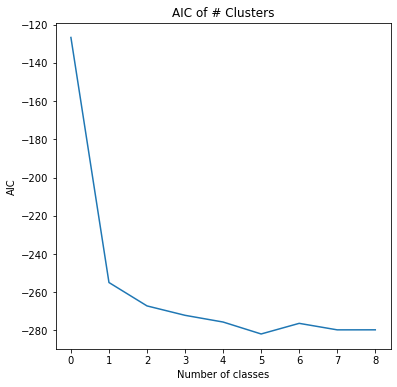

In [356]:
AIC=np.array([]);
for K in range(1,10):
    gmm = GaussianMixture(n_components=K)
    gmm.fit_predict(granite_subset)
    aic=gmm.aic(granite_subset)
    AIC=np.append(AIC,aic)

plt.plot(AIC); 
plt.xlabel('Number of classes'); 
plt.ylabel('AIC')
plt.title('AIC of # Clusters')

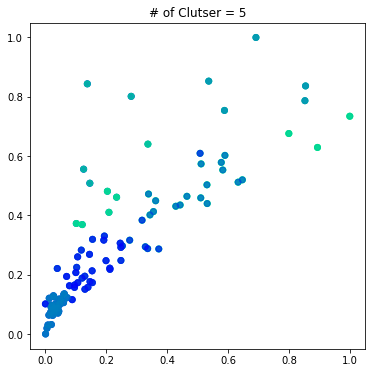

In [357]:
for i in range(2, 6):
    plt.scatter(granite_subset["Hardness"], granite_subset["Modulus"],  
           c = GaussianMixture(n_components = i).fit_predict(granite_subset), cmap =plt.cm.winter, alpha = 0.6) 
    plt.title("# of Clutser = " + str(i))
    #plt.show()   # mean and variance of 

In [358]:
# add a new column based on cluster = 4
# df['NEW_COLUMN'] = pd.Series(predict, index=df.index)
gmm_granite = gmm = GaussianMixture(n_components = 4) 
gmm.fit(granite_subset)
predict = gmm.predict(granite_subset)
granite_remoevd['label'] = pd.Series(predict, index=granite_remoevd.index)
#granite_remoevd

In [359]:
dataset = granite_remoevd.iloc[:,0:4]
dataset["X"] = pd.to_numeric(dataset["X"])
dataset["Y"] = pd.to_numeric(dataset["Y"])
# print(reshape_set.dtypes)
dataset = (dataset - dataset.min())/(dataset.max() - dataset.min())
dataset.head()

,Hardness,Modulus,X,Y
1,0.000517,0.000000,0.000052,0.999979
2,0.017389,0.073537,0.111125,0.999999
3,0.023602,0.079477,0.222200,1.000000
4,0.029816,0.085417,0.333341,1.000000
5,0.203648,0.481255,0.444443,0.999999


In [360]:
norm_hardness = granite_remoevd['Hardness']
norm_modulus = granite_remoevd['Modulus']
norm_x = reshape_set["X"]
norm_y = reshape_set["Y"]
gmm_label = granite_remoevd['label']

No handles with labels found to put in legend.


Text(0, 0.5, 'y coordinate value')

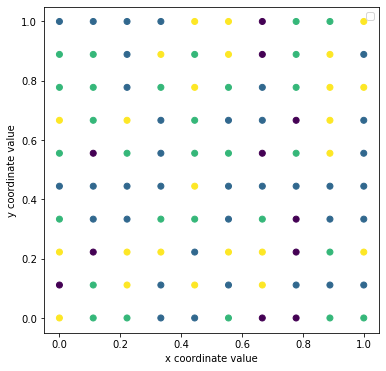

In [361]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(reshape_set["X"], reshape_set["Y"], c = granite_remoevd["label"])
plt.legend()
plt.xlabel("x coordinate value")
plt.ylabel("y coordinate value")

## Add more data points

In [362]:
import scipy as sp
import scipy.interpolate
from scipy.interpolate import griddata
roundset = dataset
roundset['X'] = round(roundset['X'], 3)
roundset['Y'] = round(roundset['Y'], 3)
roundset.head(20)

,Hardness,Modulus,X,Y
1,0.000517,0.000000,0.000,1.000
2,0.017389,0.073537,0.111,1.000
3,0.023602,0.079477,0.222,1.000
4,0.029816,0.085417,0.333,1.000
5,0.203648,0.481255,0.444,1.000
6,0.208729,0.410349,0.556,1.000
7,0.854702,0.836553,0.667,1.000
8,0.582784,0.553095,0.778,1.000
9,0.276862,0.316251,0.889,1.000
10,0.117933,0.282911,1.000,1.000


In [363]:
x = roundset['X'][0:10]
y = roundset['Y']
temp_y = []
for i in range(10):
    temp_y.append(y[10*(i+1)-1])
y = temp_y

factor = 0.1

x = factor*np.array(x)
y = factor*np.array(y)

print(x)
print(y)

[0.     0.0111 0.0222 0.0333 0.0444 0.0556 0.0667 0.0778 0.0889 0.1   ]
[0.1    0.0889 0.0778 0.0667 0.0556 0.0444 0.0333 0.0222 0.0111 0.    ]


In [364]:
hardness = roundset['Hardness']
modulus = roundset['Modulus']

new_length = 20
new_x = np.linspace(0.0, 0.1, new_length)
new_y = np.linspace(0.1, 0.0, new_length) 


print(new_x)
print(new_y)

[0.         0.00526316 0.01052632 0.01578947 0.02105263 0.02631579
 0.03157895 0.03684211 0.04210526 0.04736842 0.05263158 0.05789474
 0.06315789 0.06842105 0.07368421 0.07894737 0.08421053 0.08947368
 0.09473684 0.1       ]
[0.1        0.09473684 0.08947368 0.08421053 0.07894737 0.07368421
 0.06842105 0.06315789 0.05789474 0.05263158 0.04736842 0.04210526
 0.03684211 0.03157895 0.02631579 0.02105263 0.01578947 0.01052632
 0.00526316 0.        ]


In [365]:
xx, yy = np.meshgrid(new_x, new_y)
# plt.scatter(xx, yy)
print(xx.shape)

(20, 20)


In [366]:
hardness = hardness.values.reshape(10,10)
modulus = modulus.values.reshape(10,10)

f_hardness = sp.interpolate.interp2d(x, y, hardness, kind='linear')
new_hardness = f_hardness(new_x, new_y)
f_modulus = sp.interpolate.interp2d(x, y, modulus, kind='linear')
new_modulus = f_modulus(new_x, new_y)



new_hardness = new_hardness.reshape(new_length**2, )
new_modulus = new_modulus.reshape(new_length**2, )

xxx = xx.reshape(new_length**2,)
yyy = yy.reshape(new_length**2,)

new_dataset = pd.DataFrame([xxx, yyy, new_hardness, new_modulus]).T
new_dataset.columns = ['X', 'Y', 'Hardness', 'Modulus']
new_dataset

,X,Y,Hardness,Modulus
0,0.000000,0.1,0.101479,0.372610
1,0.005263,0.1,0.170939,0.334415
2,0.010526,0.1,0.240398,0.296220
3,0.015789,0.1,0.296216,0.358494
4,0.021053,0.1,0.350365,0.433059
...,...,...,...,...
395,0.078947,0.0,0.551162,0.528613
396,0.084211,0.0,0.406107,0.416311
397,0.089474,0.0,0.268648,0.314528
398,0.094737,0.0,0.193291,0.298719


In [367]:
new_dataset.to_csv("/Users/lixinjin/Desktop/GeorgiaTech/fall2022_VIP/Gr1_more_points.csv")

No handles with labels found to put in legend.


Text(0, 0.5, 'y coordinate value')

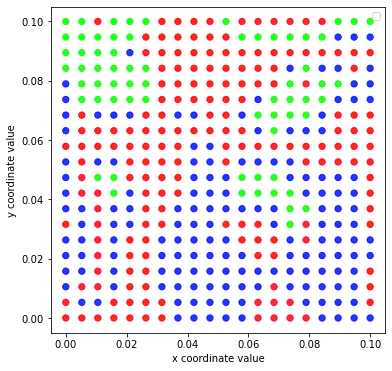

In [368]:
gmm_granite_2 = GaussianMixture(n_components = 4) 
gmm_granite_2.fit(new_dataset)
predict = gmm_granite_2.predict(new_dataset)
new_dataset['label'] = pd.Series(predict, index=new_dataset.index)
new_dataset.columns = ['X', 'Y', 'Hardness', 'Modulus', 'label']


new_dataset.index = np.arange(1, len(new_dataset) + 1)
new_dataset.head()

plt.scatter(new_dataset["X"], new_dataset["Y"], c = new_dataset["label"], 
            cmap="hsv", alpha=0.85, s=40)
plt.legend()
plt.xlabel("x coordinate value")
plt.ylabel("y coordinate value")

In [344]:
# # obtain labels per mesh point (reuse stored model)
# Z = new_dataset['label']

# # put result into color plot
# Z = Z.values.reshape(xx.shape)
# plt.imshow(
#     Z, interpolation='nearest', cmap='Set2', alpha=0.75,
#     extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#     aspect='auto', origin='lower',
# )

## Data Interpolation

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


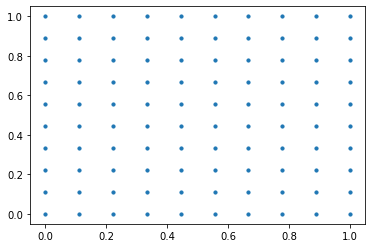

In [18]:
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.interpolate import interpn
from scipy import interpolate

n = 10
# temp_X = np.linspace(np.min(reshape_set['X']), np.max(reshape_set['X']), n)
# temp_Y = np.linspace(np.min(reshape_set['Y']), np.max(reshape_set['Y']), n)
temp_X = np.linspace(0, 1, n)
temp_Y = np.linspace(0, 1, n)
xx, yy = np.meshgrid(temp_X, temp_Y) # x,Create grid array of y

print(temp_X)

new_X = xx.reshape(n**2,)
new_Y = yy.reshape(n**2,)
plt.scatter(new_X, new_Y, s = 10) # linear create new points in 2d space

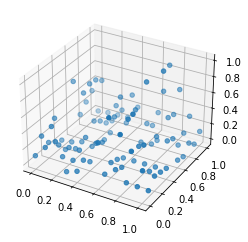

In [179]:
type = 'linear'
roundset = reshape_set
roundset['X'] = round(roundset['X'], 1)
roundset['Y'] = round(roundset['Y'], 1)
roundset_hardness = roundset[['X', 'Y', 'Hardness']].values.reshape(10,10,3)
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(roundset['X'],roundset['Y'], roundset['Hardness'])

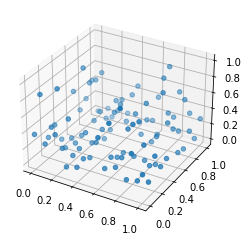

In [180]:
roundset_modulus = roundset[['X', 'Y', 'Modulus']].values.reshape(10,10,3)
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(roundset['X'],roundset['Y'], roundset['Modulus'])

In [181]:
unique_x = roundset['X'].unique().reshape(10)
unique_y = roundset['Y'].unique().reshape(10)
print(unique_x.shape)
h = roundset_hardness[:,:,2]
m = roundset_modulus[:,:,2]
print(h.shape)

# h = roundset['Hardness'].values.reshape(100,)
# m = roundset['Modulus'].values.reshape(100,)

type = "linear"

f_h = interpolate.interp2d(unique_x, unique_y, h, kind=type)
f_m = interpolate.interp2d(unique_x, unique_y, m, kind=type)

new_hardness = f_h(new_X, new_Y)
new_modulus = f_m(new_X, new_Y)

# new_hardness = f_h(temp_X, temp_Y)
# new_modulus = f_m(temp_X, temp_Y)
new_dataset = pd.DataFrame([new_X, new_Y, new_hardness[0,:], new_modulus[0,:]]).T
# print(new_dataset)
new_dataset

(10,)
(10, 10)


,0,1,2,3
0,0.000000,0.0,0.101479,0.372610
1,0.111111,0.0,0.101479,0.372610
2,0.222222,0.0,0.101479,0.372610
3,0.333333,0.0,0.101479,0.372610
4,0.444444,0.0,0.101479,0.372610
...,...,...,...,...
95,0.555556,1.0,0.335866,0.287939
96,0.666667,1.0,0.335866,0.287939
97,0.777778,1.0,0.335866,0.287939
98,0.888889,1.0,0.335866,0.287939


In [182]:
# f_hardness = interp2d(reshape_set['X'], reshape_set['Y'], reshape_set['Hardness'], kind = type)
#####====================================================================================================

f_hardness = interp2d(reshape_set['X'], reshape_set['Y'], reshape_set['Hardness'], kind = type)
new_hardness = f_hardness(new_X, new_Y)
f_modulus = interp2d(reshape_set['X'], reshape_set['Y'], reshape_set['Modulus'], kind = type)
new_modulus = f_modulus(new_X, new_Y)
new_dataset = pd.DataFrame([new_X, new_Y, new_hardness[0,:], new_modulus[0,:]])
new_dataset = new_dataset.T
new_dataset.head()

,0,1,2,3
0,0.000000,0.0,0.101479,0.37261
1,0.111111,0.0,0.101479,0.37261
2,0.222222,0.0,0.101479,0.37261
3,0.333333,0.0,0.101479,0.37261
4,0.444444,0.0,0.101479,0.37261


In [183]:
gmm_granite_2 = GaussianMixture(n_components = 4) 
gmm_granite_2.fit(new_dataset)
predict = gmm_granite_2.predict(new_dataset)
new_dataset['label'] = pd.Series(predict, index=new_dataset.index)
new_dataset.columns = ['X', 'Y', 'Hardness', 'Modulus', 'label']

new_dataset.index = np.arange(1, len(new_dataset) + 1)
new_dataset.head()

,X,Y,Hardness,Modulus,label
1,0.000000,0.0,0.101479,0.37261,0
2,0.111111,0.0,0.101479,0.37261,0
3,0.222222,0.0,0.101479,0.37261,0
4,0.333333,0.0,0.101479,0.37261,0
5,0.444444,0.0,0.101479,0.37261,0


No handles with labels found to put in legend.


Text(0, 0.5, 'y coordinate value')

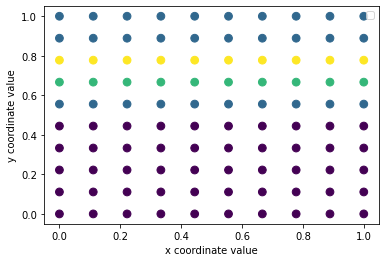

In [184]:
plt.scatter(new_dataset["X"], new_dataset["Y"], c = new_dataset["label"], s = 60)
plt.legend()
plt.xlabel("x coordinate value")
plt.ylabel("y coordinate value")

In [185]:
# # Griddata method
# # same as above
# n = 30
# temp_X = np.linspace(0, 1, n)
# temp_Y = np.linspace(0, 1, n)
# xx, yy = np.meshgrid(temp_X, temp_Y) # x,Create grid array of y
# knew_xy_coord = reshape_set[['X', 'Y']].values
# print(knew_xy_coord.shape)
# # knew_values = reshape_set['Hardness'].values
# knew_values = granite_remoevd["label"]

In [186]:
# from scipy.interpolate import griddata
# result = griddata(points=knew_xy_coord, values=knew_values, xi=(xx, yy), method='linear')
# result.shape

In [187]:
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111)
# ax.set_aspect('equal', adjustable='box') # wants the x and y aspect ratios to be the same.
# ax.contourf(xx, yy, result, cmap='jet')
# plt.show()

In [188]:
knew_hardness = granite_remoevd["Hardness"]
knew_modulus = granite_remoevd["Modulus"]

m = "nearest"
result_hardness = griddata(points=knew_xy_coord, values=knew_hardness, xi=(yy,xx), method=m)
result_modulus = griddata(points=knew_xy_coord, values=knew_modulus, xi=(xx, yy), method=m)
# print(np.isnan(result_hardness).sum())

In [189]:
new = np.array([xx, yy, result_hardness, result_modulus]).T
new = new.reshape(n**2,4)
new = pd.DataFrame(new)
new.head()

,0,1,2,3
0,0.0,0.000000,0.101479,0.372610
1,0.0,0.111111,0.247969,0.801430
2,0.0,0.222222,0.362170,0.194817
3,0.0,0.333333,0.024116,0.286715
4,0.0,0.444444,0.071807,0.031762


In [190]:
new.index = np.arange(1, len(new) + 1)
new.columns = ["X", "Y", "Hardness", "Modulus"]

In [198]:
gmm_granite_2 = GaussianMixture(n_components = 4) 
gmm_granite_2.fit(new)
predict = gmm_granite_2.predict(new)
new['label'] = pd.Series(predict, index=new.index)
new.columns = ['X', 'Y', 'Hardness', 'Modulus', 'label']

new.index = np.arange(1, len(new) + 1)
new.head()

,X,Y,Hardness,Modulus,label
1,0.0,0.000000,0.101479,0.372610,0
2,0.0,0.111111,0.247969,0.801430,0
3,0.0,0.222222,0.362170,0.194817,0
4,0.0,0.333333,0.024116,0.286715,0
5,0.0,0.444444,0.071807,0.031762,0


No handles with labels found to put in legend.


Text(0, 0.5, 'y coordinate value')

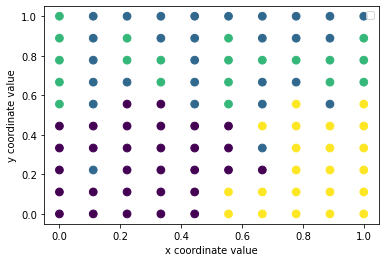

In [199]:
plt.scatter(new["X"], new["Y"], c = new["label"], s = 60)
plt.legend()
plt.xlabel("x coordinate value")
plt.ylabel("y coordinate value")

In [204]:
sub_new = new[['X', 'Y', 'label']]
sub_new_3 = sub_new.values.reshape(n,n,3)

sub_new_3_label = sub_new_3[:,:,2]
sub_new_3_label

array([[0., 0., 0., 0., 0., 2., 2., 2., 2., 2.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 2., 2., 1.],
       [0., 0., 0., 0., 0., 0., 2., 2., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [3., 3., 0., 0., 0., 2., 2., 2., 2., 1.],
       [3., 3., 0., 1., 3., 1., 1., 2., 1., 1.],
       [3., 3., 3., 3., 3., 3., 1., 2., 1., 1.],
       [3., 3., 3., 3., 3., 1., 2., 2., 1., 1.],
       [3., 3., 3., 3., 3., 3., 2., 2., 2., 1.]])

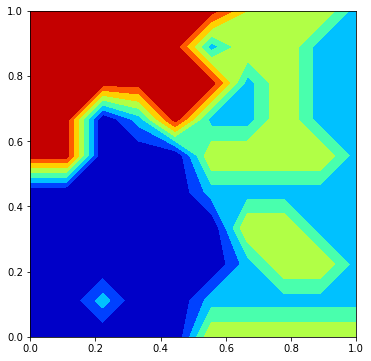

In [203]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box') # wants the x and y aspect ratios to be the same.
ax.contourf(xx, yy, sub_new_3_label, cmap='jet')
plt.show()